# Synthetic Dataset, Plot & Commit to GitHub 

A la fin de ce workshop vous saurez:

- Adopter un workflow de base avec Github (Develop, Verify, Commit)
- Générer un dataset synthetic de classification 2D avec sklearn
- Visualiser les classes du dataset sur un graphique 2D
- Visualiser les prédictions de votre réseau de neurones sur un graphique 2D
- (BONUS) : Refactoring 101, refactoriser du code jupyter en une fonction réutilisable.

ICI, après avoir recopier ça vous ferez votre premier commit sur un repo neuf.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_classification

# ICI on Commit "Import des librairies."

## Linearly Separable Dataset

In [2]:
# Objectif : "Créer un dataset séparable par une ligne droite en 2D"

train_size = 100
test_size  =  50
total_size = train_size + test_size

X, y = make_classification(n_samples=total_size,
                           n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

In [3]:
X.shape, y.shape

((150, 2), (150,))

In [4]:
# On reshape pour fixer la size du vecteur.
y = y.reshape(-1, 1)

In [5]:
# On sépare en train / test.

X_train, y_train = (X[:train_size], y[:train_size])
X_test, y_test   = (X[-test_size:], y[-test_size:])

assert X_test.shape[0] + X_train.shape[0] == total_size, ( X_test.shape[0] + X_train.shape[0])

linearly_separable_train = (X_train, y_train)
linearly_separable_test  = (X_test, y_test)

# ICI on commit : on a réussi à créer notre dataset

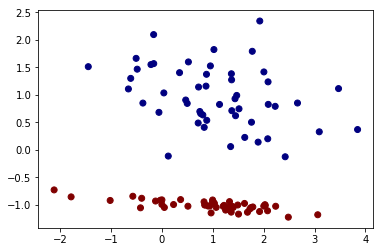

In [6]:
# Objectif : Plot le dataset

plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train[:, 0], 
            cmap=plt.cm.jet)

# ICI on commit: on a réussi à plot le dataset.


### Bonus : Refactoring

 Petit tuto refactoring, je vais refactoriser le coder pour générer et splitter les datasets pour en faire une fonction.
 
#### Bonus1: On va refactoriser la cellule ci dessous dans une fonction

In [7]:
# Objectif : Factoriser le code contenu dans cette cellule dans une fonction.

train_size = 100
test_size  =  50
total_size = train_size + test_size

X, y = make_classification(n_samples=total_size,
                           n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

y = y.reshape(-1, 1)


X_train, y_train = (X[:train_size], y[:train_size])
X_test, y_test   = (X[-test_size:], y[-test_size:])

assert X_test.shape[0] + X_train.shape[0] == total_size, ( X_test.shape[0] + X_train.shape[0])

linearly_separable_train = (X_train, y_train)
linearly_separable_test  = (X_test, y_test)

#### La fonction équivalente ci-dessous.

In [8]:
def split_dataset(X, y, train_pct=0.66):
    """ A partir d'exemples X et de labels y, retourne un tuple contenant deux tuples:
        (X_train, y_train), (X_test, y_test).
        
        :X examples de shape=(-1, 2)
        :y labels de shape=(-1)
        :train_pc (default=0.66) pourcentage du dataset à utiliser pour l'entrainement
        
        exemple:
        >>> train, test = split_dataset(X,y)
        >>> X_train, y_train = *train
        >>> X_test, y_test   = *test
    """
    
    total_size = X.shape[0] 
    train_size = int(train_pct * total_size)
    test_size  = total_size - train_size
    
    y = y.reshape(-1, 1)
    
    X_train, y_train = (X[:train_size], y[:train_size])
    X_test, y_test   = (X[-test_size:], y[-test_size:])

    assert X_test.shape[0] + X_train.shape[0] == total_size, ( X_test.shape[0] + X_train.shape[0])

    train = (X_train, y_train)
    test  = (X_test, y_test)
    return (train, test)

#### On vérifie que la fonction "fonctionne" correctement avant de commit

In [9]:
# On test le code    
X, y = make_classification(n_samples=total_size,
                           n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

train, test = split_dataset(X, y)
linearly_separable_train = train
linearly_separable_test  = test

print(linearly_separable_train[0].shape, linearly_separable_train[1].shape)
print(linearly_separable_test[0].shape, linearly_separable_test[1].shape)

# ICI On commit: "On a réussi à factoriser le split de dataset"

(99, 2) (99, 1)
(51, 2) (51, 1)


#### Bonus2: On va refactoriser le code pour plot le dataset dans une fonction

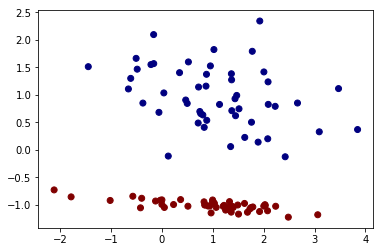

In [10]:
# Objectif : Refactoriser ce code dans une foncton

plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train[:, 0], 
            cmap=plt.cm.jet)

#### La fonction équivalente ci-dessous

In [11]:
# Objectif: Coder une fonction pour plot facilement le dataset.

def plot_dataset(dataset):
    """ Permet d'afficher un dataset empaqueter dans un tuple.
    
    :dataset tuple (X, y) où X.shape=(-1, 2), y.shape=(-1, 1)
    """
    X, y = dataset
    plt.scatter(X[:, 0], X[:, 1], 
            c=y[:, 0], 
            cmap=plt.cm.jet)

#### On vérifie que la fonction "fonctionne" correctement avant de commit

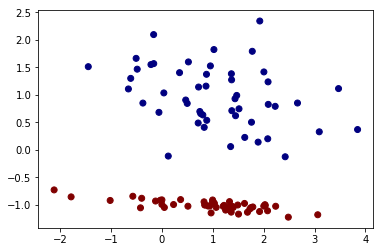

In [12]:
plot_dataset(linearly_separable_train)

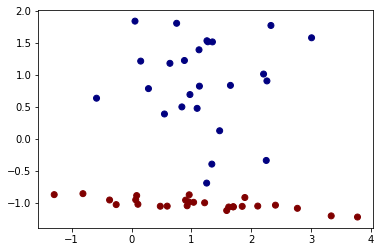

In [13]:
plot_dataset(linearly_separable_test)

In [14]:
# La fonction se comporte correctement.

# ICI On commit

## Bonus3 : Reprise du code d'originer avec les factions refactorisés.

On appréciera ici le gain de lisibilité.

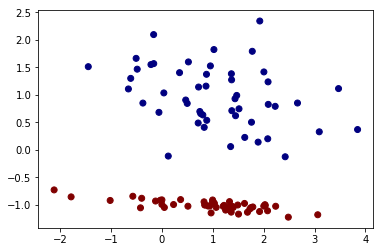

In [15]:
# Générer des datapoints séparables par une ligne
X, y = make_classification(n_samples=total_size,
                           n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# Séparer ces datapoints en deux sets, un pour l'entrainement, un pour le test.
train, test = split_dataset(X, y)

linearly_separable_train = train
linearly_separable_test  = test

# On plot pour vérifier la tronche de nos datasets.
plot_dataset(linearly_separable_train)

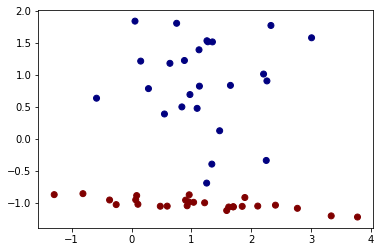

In [16]:
plot_dataset(linearly_separable_test)

Et voilà, en quelques lignes seulement, c'est pas beau la vie.
Ici aussi on commit pour la forme.

## Make Moons Synthetic Dataset

Objectif : Créer un dataset avec la fonction makemoons.

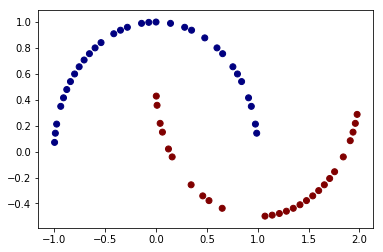

In [17]:
total_size=90
# Générer des datapoints séparables par une ligne
X, y = make_moons(n_samples=total_size)

# Séparer ces datapoints en deux sets, un pour l'entrainement, un pour le test.
train, test = split_dataset(X, y)

moons_train = train
moons_test  = test

# On plot pour vérifier la tronche de nos datasets.
plot_dataset(moons_train)

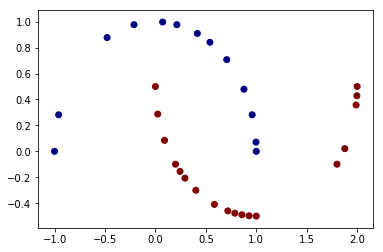

In [18]:
plot_dataset(moons_test)

On peut commit suite à notre succès :)

## Make Circles Synthetic Dataset
Objectif : Créer un dataset avec la fonction makemoons.

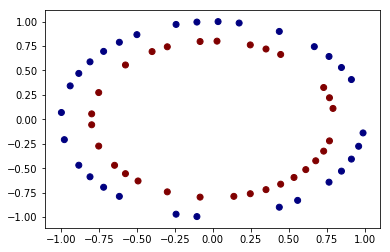

In [19]:
total_size=90
# Générer des datapoints séparables par une ligne
X, y = make_circles(n_samples=total_size)

# Séparer ces datapoints en deux sets, un pour l'entrainement, un pour le test.
train, test = split_dataset(X, y)

circles_train = train
circles_test  = test

# On plot pour vérifier la tronche de nos datasets.
plot_dataset(circles_train)

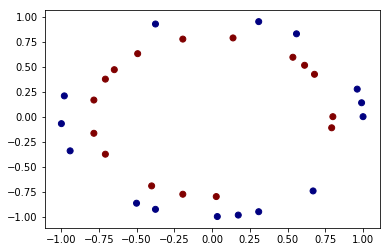

In [20]:
plot_dataset(circles_test)

Et ici aussi on commit!

## Plot Neural Network Prediction

Objectif; visualiser les prédictions d'un réseau de neurones sur un graphique 2D

*N.B. (Ici on va seulement coder une forward pass sans entraîner le réseau, à vous d'utiliser votre propre code de réseaux de neurones pour voir comment il se comporte sur ces datasets synthetic.)*

In [21]:
# D'abord checker les dimensions des inputs

X_train, y_train = circles_train

X_train.shape

# Commit

(59, 2)

In [22]:
# Création des paramètres du NN

n_neuron_1 = 10
n_x_features = X_train.shape[1]

# BONUS TIPS: Afin de pouvoir reproduire ses résultats, on peut utiliser une graine aléatoire qui va "forcer" le hasard.
np.random.seed(777)

# Init aléatoire
W1 = np.random.randn(n_neuron_1, n_x_features)
b1 = np.zeros((n_neuron_1, 1))

print(W1.shape, b1.shape)

n_neuron_2 = 1
W2 = np.random.randn(n_neuron_2, n_neuron_1)
b2 = np.zeros((n_neuron_2, 1))

print(W2.shape, b2.shape)

# Commit

(10, 2) (10, 1)
(1, 10) (1, 1)


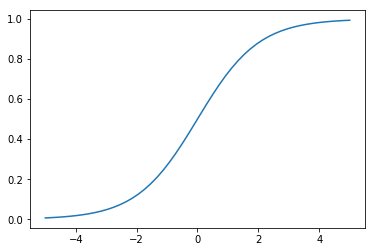

In [23]:
# Creation fonction d'activation

def sigmoid(Z):
    eZ = np.exp(-Z)
    return 1. / (1. + eZ)

# On vérifie sa sigmoid en plottant un linspace

ligne = np.linspace(-5, 5)
sig = sigmoid(ligne)
plt.plot(ligne, sig)

In [24]:
# On vérifie aussi qu'elle conserve bien les dimensions:

print(sigmoid(X_train).shape)

(59, 2)


On est bon, on commit la sigmoid

In [25]:
# Forward Pass

# d'abord on print les shapes pour voir dans quel ordre on multiplie ses matrices
print(X_train.shape, W1.shape, b1.shape)

(59, 2) (10, 2) (10, 1)


In [26]:
# La première couche

# Toujours print les shapes de ces matrices pour pas faire de boulettes.
print(X_train.shape, '*',W1.T.shape, '+', b1.T.shape)
Z1 = np.dot(X_train, W1.T) + b1.T
print('=', Z1.shape)
A1 = sigmoid(Z1)
print('->', A1.shape)

(59, 2) * (2, 10) + (1, 10)
= (59, 10)
-> (59, 10)


In [27]:
# La deuxieme couche, qui nous donne les probabilités de la classe positive pour chaque exemple.

print(A1.shape, '*',W2.T.shape, '+', b2.T.shape)
Z2 = np.dot(A1, W2.T) + b2.T
print('=', Z2.shape)
A2 = sigmoid(Z2)
print('->', A2.shape)

# On regarde les 10 premiers exemples pour la forme, pour checker qu'ils sont entre 0 et 1.
A2[:10, :]

(59, 10) * (10, 1) + (1, 1)
= (59, 1)
-> (59, 1)


array([[0.75531757],
       [0.32622653],
       [0.63259263],
       [0.36654754],
       [0.73386769],
       [0.33588597],
       [0.44793874],
       [0.77428673],
       [0.35737994],
       [0.65069727]])

In [28]:
# On transforme les probas en 0 ou 1.
Y_hat_train = (A2 > 0.5) * 1

Y_hat_train

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0]])

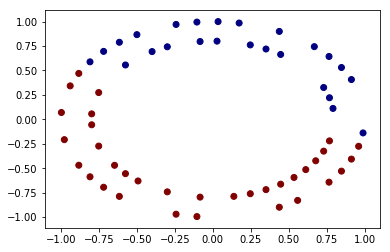

In [29]:
# On utilise la fonction codée précédemment pour visualiser ses prédictions.

predictions_circles = (X_train, Y_hat_train)
plot_dataset(predictions_circles)

(Nota Bene: Il se peut que vous obteniez des résultats différents sur les predictions en fonction de l'initalisation aléatoire. Tester avec plusieurs init différentes pour observer des résultats différents.

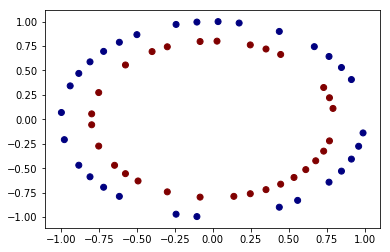

In [30]:
# On compare avec les vrais labels du dataset synthetic.

plot_dataset(circles_train)

Bon on constate, bel et bien, que notre réseau de neurones sans entraînement, c'est pas la joie.

Bravo d'être arrivé jusqu'ici! Vous pouvez commitez une dernière fois pour ce workshop

## Et maintenant??

Vous avez toutes les clefs en mains pour essayer d'utiliser votre propre réseau de neurones from scratch pour dompter ces datasets.

Si vos shapes ne sont pas dans le même sens vous avez deux options:
- Transposer les exemples et les labels synthetic pour qu'il match les shapes attendus par votre réseau de neurones (recommandé) (N.B. vous aurez à modifier la fonction de visualisation ;) )
- Changer l'ordre des matrices dans les multipications matrices pour qu'elles matchent les exemples et labels synthetic (pour le challenge)

Profitez en pour adopter la bonne pratique du micro-commit régulier pour gérer votre coder et structurer votre worflow.

Happy Coding ;)
